In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import ipywidgets as widgets

In [3]:
train_raw = pd.read_csv('train.csv', index_col = 'Date', parse_dates = True)

In [4]:
stores_raw = pd.read_csv('stores.csv')

In [5]:
features_raw = pd.read_csv('features.csv', index_col = 'Date', parse_dates = True)

In [6]:
test_raw = pd.read_csv('test.csv', index_col = 'Date', parse_dates = True)

In [7]:
stores_raw.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores = stores_raw.copy()

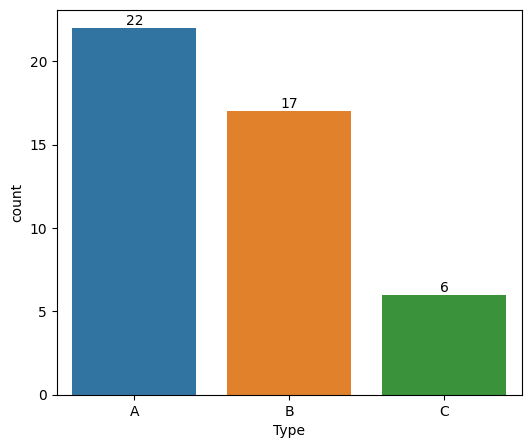

In [9]:
fig, ax = plt.subplots(figsize = (6,5))
sns.countplot(x = stores.Type)
for i, j in enumerate(stores.Type.value_counts()):    
    plt.text(x = i, y = j + 0.2, s = j, ha = 'center');

In [10]:
stores.groupby('Type')['Size'].agg(['max', 'min']) # Type is not labelled based on Size binning, could be just max or mean size

,max,min
Type,,
A,219622,39690
B,140167,34875
C,42988,39690


In [11]:
stores.groupby('Type')['Size'].mean()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

<Axes: ylabel='Frequency'>

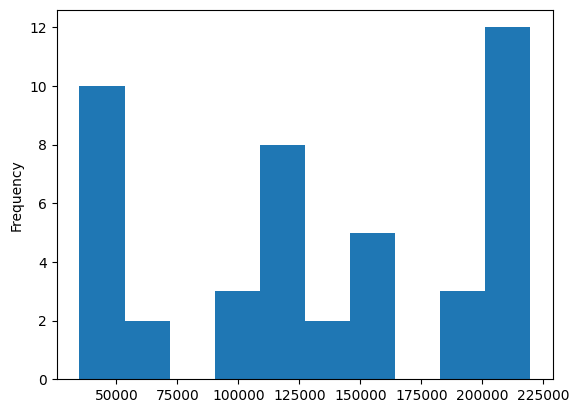

In [12]:
stores.Size.plot(kind = 'hist', bins = 10)

In [13]:
train = train_raw.copy()

In [14]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [15]:
def store1_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = train.loc[(train.Store == 1) & (train.Dept == department)]['Weekly_Sales']
    sns.lineplot(x = temp.index, y = temp.values)

In [16]:
widgets.interact(store1_trend, department = train.loc[train.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

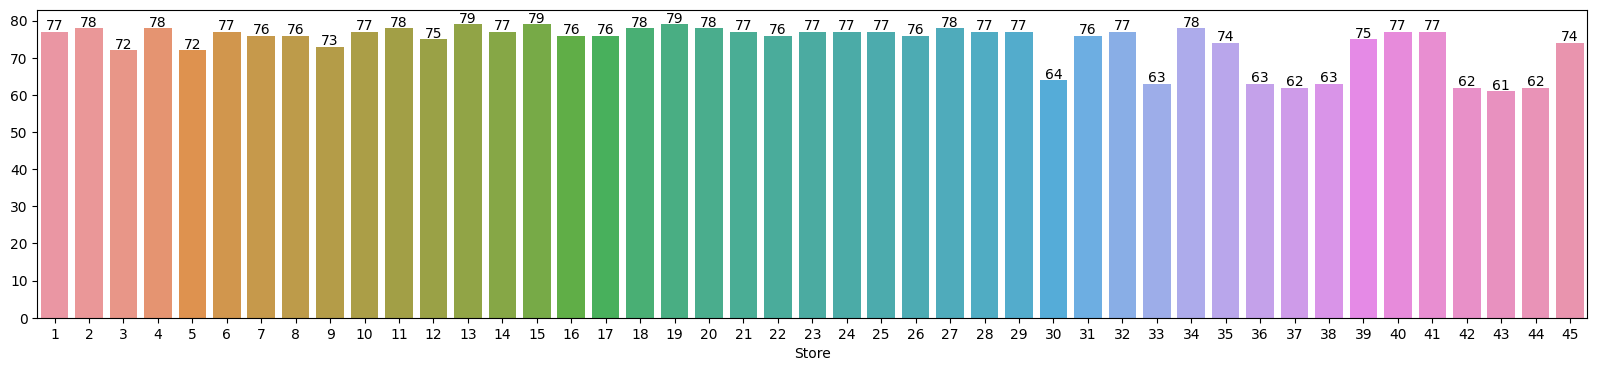

In [17]:
no_of_dept = train.groupby(['Store'])['Dept'].nunique()
fig, ax = plt.subplots(figsize = (20,4))
sns.barplot(x = no_of_dept.index, y = no_of_dept.values)
for i, j in enumerate(no_of_dept):    
    plt.text(x = i, y = j + 0.5, s = j, ha = 'center');

In [18]:
no_of_dept.sum() * 33

109923

In [19]:
no_of_dept.describe()

count    45.000000
mean     74.022222
std       5.654800
min      61.000000
25%      74.000000
50%      77.000000
75%      77.000000
max      79.000000
Name: Dept, dtype: float64

In [20]:
no_of_dept = no_of_dept.reset_index()

In [21]:
no_of_dept.head()

,Store,Dept
0,1,77
1,2,78
2,3,72
3,4,78
4,5,72


In [22]:
store_dept = pd.merge(no_of_dept, stores, on = 'Store')

In [23]:
store_dept.head()

,Store,Dept,Type,Size
0,1,77,A,151315
1,2,78,A,202307
2,3,72,B,37392
3,4,78,A,205863
4,5,72,B,34875


In [24]:
store_dept.corr()

,Store,Dept,Size
Store,1.000000,-0.512261,-0.244270
Dept,-0.512261,1.000000,0.768344
Size,-0.244270,0.768344,1.000000


In [25]:
store_dept.groupby('Type')['Dept'].agg(['max', 'min'])

,max,min
Type,,
A,79,63
B,79,72
C,64,61


In [26]:
store_weekly_sales = train.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

In [27]:
store_weekly_sales.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


In [28]:
features = features_raw[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]

In [29]:
features = features['2010-02-05':'2012-10-26']

In [30]:
print(features.shape)
print(store_weekly_sales.shape)

(6435, 6)
(6435, 3)


In [31]:
features.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,False
2010-02-12,1,38.51,2.548,211.242170,8.106,True
2010-02-19,1,39.93,2.514,211.289143,8.106,False
2010-02-26,1,46.63,2.561,211.319643,8.106,False
2010-03-05,1,46.50,2.625,211.350143,8.106,False


In [32]:
holidays = pd.DataFrame({'Holiday': ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day']},
                        index = train.loc[train.IsHoliday == True].index.unique())

In [33]:
overall = pd.merge(store_weekly_sales, features, left_on = ['Date', 'Store'], right_on = [features.index, 'Store'])

In [34]:
overall = overall.set_index('Date')

In [35]:
overall.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False
2010-02-12,1,1641957.44,38.51,2.548,211.242170,8.106,True
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False


In [36]:
def overall_ts(store):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = overall.loc[overall.Store == store]['Weekly_Sales']
    sns.lineplot(x = temp.index, y = temp.values)

In [37]:
widgets.interact(overall_ts, store = overall.Store.unique());

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [38]:
overall.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False
2010-02-12,1,1641957.44,38.51,2.548,211.242170,8.106,True
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False


In [39]:
overall_pivot = pd.pivot_table(data = overall, values = 'Weekly_Sales', index = overall.index, columns = 'Store')
overall_pivot.head(2)

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,2136989.46,461622.22,2135143.87,317173.1,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-12,1641957.44,2137809.50,420728.96,2188307.39,311825.7,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64


In [40]:
# Same as overall.groupby('Date')
date_avg = overall_pivot.mean(axis = 1)

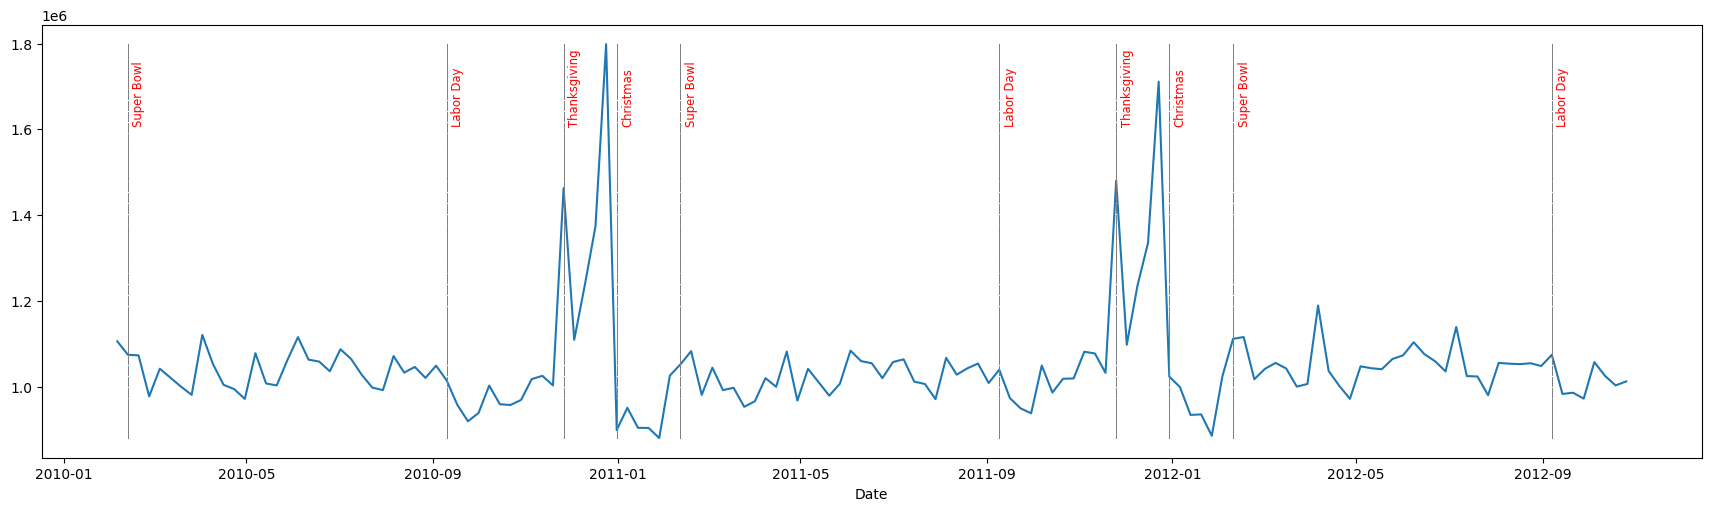

In [41]:
fig, ax = plt.subplots(figsize = (17, 5), layout = 'constrained')
sns.lineplot(x = date_avg.index, y = date_avg.values)
plt.vlines(x = overall.loc[overall.IsHoliday == True].index, ymin = date_avg.min(), ymax = date_avg.max(), linestyles = 'dashed', color = 'grey', linewidth = 0.5)
for i, j in zip(holidays.index, holidays.values):
    plt.text(x = i + pd.DateOffset(days = 3), y = date_avg.quantile(0.99), s = j[0], rotation = 90, fontsize = 'small', alpha = 1, color = 'red')

In [42]:
# What's the busiest holiday, 2nd busiest holiday, lowest sale day...

In [43]:
train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [44]:
# w1 = train.loc[(train.Store == 1) & (train.Dept == 1)]['Weekly_Sales'].resample('m').sum().to_frame()

In [45]:
monthly_trend = pd.DataFrame()

In [46]:
for i in train.Store.unique():
    for j in train.loc[train.Store == i]['Dept'].unique():
        x = train.loc[(train.Store == i) & (train.Dept == j)]['Weekly_Sales'].resample('m').sum().reset_index()
        x['Store'] = i
        x['Dept'] = j
        monthly_trend = pd.concat([monthly_trend, x], axis = 0, ignore_index = True)

In [47]:
monthly_trend.rename(columns = {'Weekly_Sales': 'Monthly_Sales'}, inplace = True)

In [48]:
monthly_trend['Month'] = monthly_trend.Date.apply(lambda x: f'{x.month_name()} {x.year}')

In [49]:
monthly_trend.set_index('Date', inplace = True)

In [50]:
def store1_monthly_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    y = monthly_trend.loc[(monthly_trend.Store == 1) & (monthly_trend.Dept == department)]['Monthly_Sales']
    x = monthly_trend.loc[(monthly_trend.Store == 1) & (monthly_trend.Dept == 1)]['Month']
    sns.lineplot(x = x, y = y)
    plt.xticks(rotation = 75)
    plt.grid();

In [51]:
widgets.interact(store1_monthly_trend, department = monthly_trend.loc[monthly_trend.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [52]:
def store_avg_weekly(metric = 'mean'):
    fig, ax = plt.subplots(figsize = (17, 5), layout = 'constrained')
    if metric == 'mean':
        x = train.groupby('Store')['Weekly_Sales'].mean()
        sns.barplot(x = x.index, y = x.values)
        for i, j in enumerate(x):
            if i in [3, 13, 19]:
                plt.text(x = i, y = j + 200, s = round(j), ha = 'center', color = 'blue')
            else:
                plt.text(x = i, y = j + 500, s = round(j), ha = 'center', color = 'blue', rotation = 90);
    else:
        x = train.groupby('Store')['Weekly_Sales'].median()
        sns.barplot(x = x.index, y = x.values)
        for i, j in enumerate(x):
            if i == 19:
                plt.text(x = i, y = j + 200, s = round(j), ha = 'center', color = 'blue')
            else:
                plt.text(x = i, y = j + 300, s = round(j), ha = 'center', color = 'blue', rotation = 90);

In [53]:
widgets.interact(store_avg_weekly, metric = widgets.ToggleButtons(options=['mean', 'median']));

interactive(children=(ToggleButtons(description='metric', options=('mean', 'median'), value='mean'), Output())…

In [54]:
def holiday_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = train.loc[(train.Store == 1) & (train.Dept == department)]['Weekly_Sales']
    plt.plot(temp.index, temp.values, alpha = 1)
    plt.vlines(x = holidays.index, ymin = temp.min(), ymax = temp.max(), linestyles = 'dashed', color = 'grey', linewidth = 0.5)
    for i, j in zip(holidays.index, holidays.values):
        plt.text(x = i + pd.DateOffset(days = 3), y = temp.quantile(0.95), s = j[0], rotation = 90, fontsize = 'small', alpha = 0.5, color = 'red')

In [55]:
widgets.interact(holiday_trend, department = train.loc[train.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [56]:
# Distribution of weekly sales in each store

In [57]:
def overall_dist(store = 1):
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))
    st = overall.loc[overall.Store == store]['Weekly_Sales']
    sns.histplot(st, kde = True, ax = ax[0], color = 'orange')
    sns.boxplot(st, orient = 'h', ax = ax[1], color = 'green');

In [58]:
widgets.interact(overall_dist, store = overall.Store.unique());

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

<Axes: xlabel='Date'>

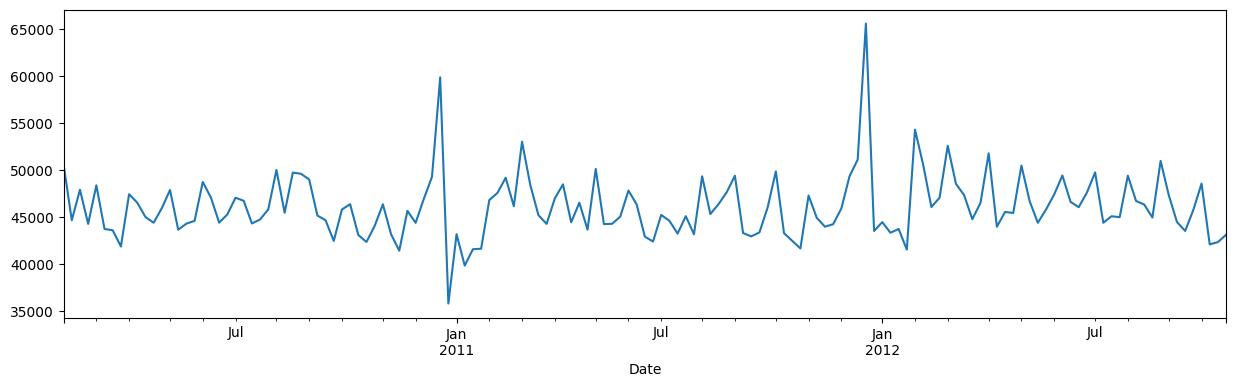

In [59]:
train.loc[(train.Store == 1) & (train.Dept == 2)]['Weekly_Sales'].plot(figsize = (15, 4))

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
x = train.loc[(train.Store == 1) & (train.Dept == 2)]['Weekly_Sales']

In [62]:
adfuller(train.loc[(train.Store == 1) & (train.Dept == 2)]['Weekly_Sales'])

(-5.814018779308292,
 4.3346460273169563e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2456.3123084781137)

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

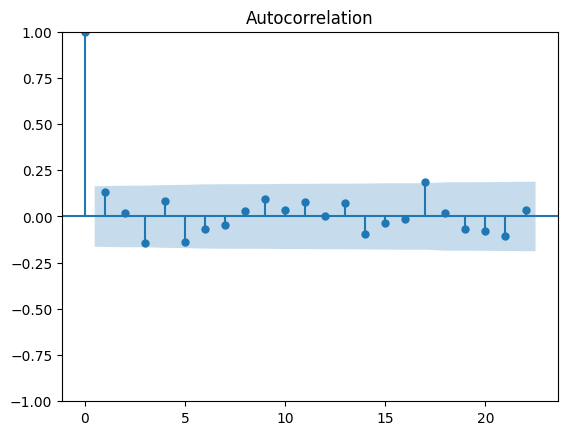

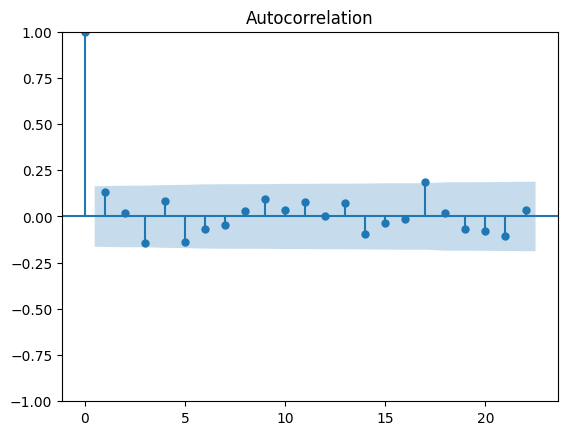

In [64]:
plot_acf(x)

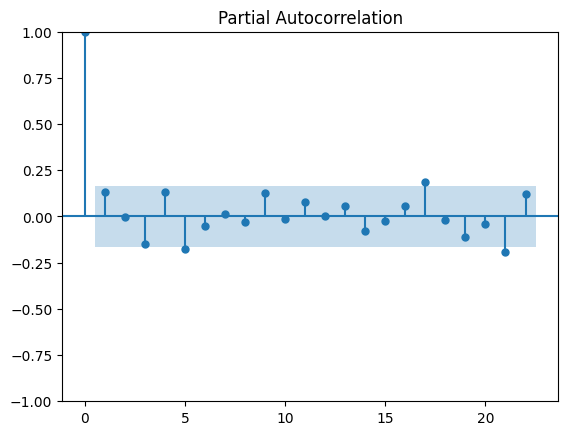

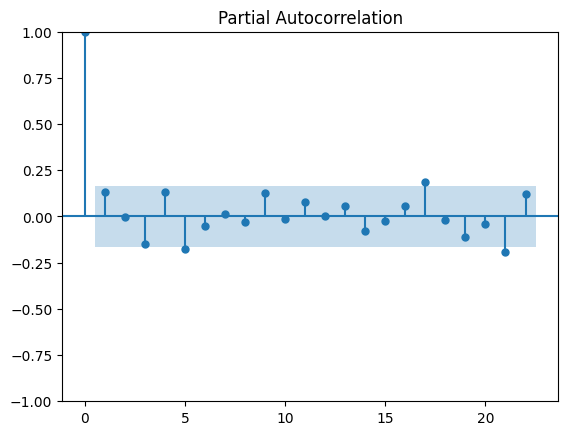

In [65]:
plot_pacf(x)

In [66]:
X = train.loc[(train.Store == 1) & (train.Dept == 2)]

In [67]:
train.loc[(train.Store == 1) & (train.Dept == 2)]

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,2,50605.27,False
2010-02-12,1,2,44682.74,True
2010-02-19,1,2,47928.89,False
2010-02-26,1,2,44292.87,False
2010-03-05,1,2,48397.98,False
...,...,...,...,...
2012-09-28,1,2,45784.76,False
2012-10-05,1,2,48577.08,False
2012-10-12,1,2,42112.67,False


In [68]:
train1 = X.iloc[:100]
train1

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,2,50605.27,False
2010-02-12,1,2,44682.74,True
2010-02-19,1,2,47928.89,False
2010-02-26,1,2,44292.87,False
2010-03-05,1,2,48397.98,False
...,...,...,...,...
2011-12-02,1,2,45928.14,False
2011-12-09,1,2,49357.43,False
2011-12-16,1,2,51137.42,False


In [69]:
test1 = X.loc['2012-01-06':]
test1.shape

(43, 4)

In [93]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train1['Weekly_Sales'], order=(17,1,5))
model_fit = model.fit()

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                ARIMA(17, 1, 5)   Log Likelihood                -961.893
Date:                Thu, 13 Jul 2023   AIC                           1969.785
Time:                        21:27:29   BIC                           2029.473
Sample:                    02-05-2010   HQIC                          1993.935
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1706      0.849     -0.201      0.841      -1.835       1.493
ar.L2         -0.3727      0.912     -0.409      0.683      -2.160       1.415
ar.L3          0.1283      0.845      0.152      0.879      -1.529       1.785
ar.L4         -0.1735      0.833     -0.208      0.835      -1.806       1.460
ar.L5          0.0711      0.920      0.077      0.938      -1.733       1.875
ar.L6          0.0254      0.590      0.043      0.966      -1.131       1.181
ar.L7         -0.0567      0.454     -0.125      0.901      -0.947       0.833
ar.L8          0.0907      0.428      0.212      0.832      -0.749       0.930
ar.L9         -0.0086      0.325     -0.026      0.979      -0.646       0.629
ar.L10         0.0351      0.331      0.106      0.916      -0.613       0.683
ar.L11         0.1025      0.260      0.394      0.694      -0.407       0.612
ar.L12         0.0390      0.228      0.171      0.864      -0.408       0.486
ar.L13         0.0330      0.206      0.160      0.873      -0.372       0.438
ar.L14        -0.0435      0.211     -0.207      0.836      -0.456       0.369
ar.L15         0.0001      0.177      0.001      0.999      -0.347       0.347
ar.L16         0.0419      0.193      0.218      0.828      -0.335       0.419
ar.L17         0.1600      0.165      0.971      0.332      -0.163       0.483
ma.L1         -0.2499      0.863     -0.289      0.772      -1.942       1.442
ma.L2          0.2602      0.875      0.298      0.766      -1.454       1.974
ma.L3         -0.4787      0.639     -0.749      0.454      -1.730       0.773
ma.L4          0.2555      0.650      0.393      0.694      -1.018       1.529
ma.L5         -0.3333      0.844     -0.395      0.693      -1.987       1.320
sigma2      1.348e+07   2.51e-07   5.36e+13      0.000    1.35e+07    1.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):               164.78
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.60
Prob(H) (two-sided):                  0.03   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.55e+30. Standard errors may be unstable.
"""

In [95]:
pred = model_fit.predict(start = test1.index[0], end = test1.index[-1])

In [96]:
residuals = test1.Weekly_Sales - pred

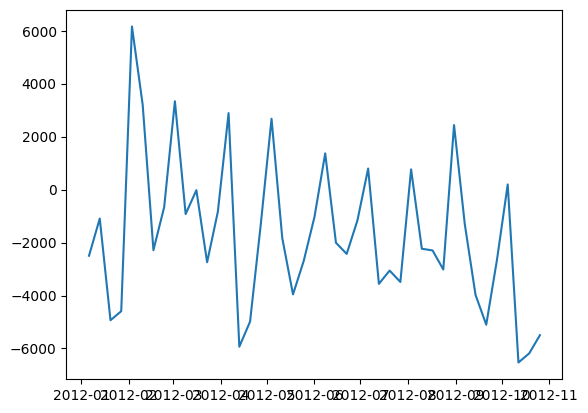

In [97]:
plt.plot(residuals)

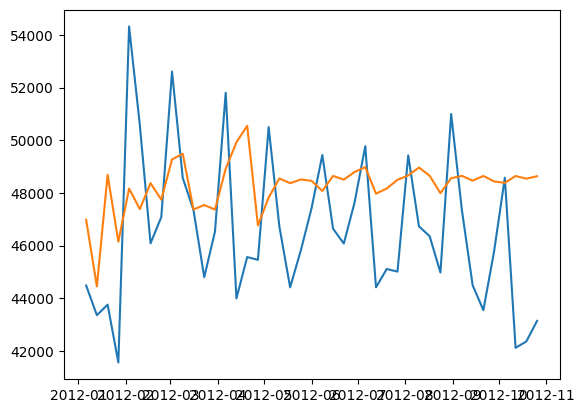

In [98]:
plt.plot(test1.Weekly_Sales)
plt.plot(pred)

In [99]:
round(np.mean(abs(residuals/test1.Weekly_Sales)),4)

0.0614

In [91]:
np.sqrt(np.mean(residuals**2))

3400.3360617557437

<Axes: ylabel='Density'>

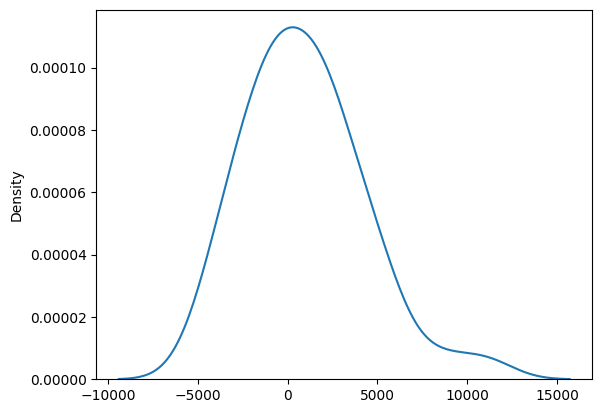

In [92]:
sns.kdeplot(residuals)

In [106]:
from ydata_profiling import ProfileReport

In [107]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      115064 non-null  int64
 1   Dept       115064 non-null  int64
 2   IsHoliday  115064 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [111]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Temperature   6435 non-null   float64
 2   Fuel_Price    6435 non-null   float64
 3   CPI           6435 non-null   float64
 4   Unemployment  6435 non-null   float64
 5   IsHoliday     6435 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 307.9 KB
